# Human Activity Recognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [10]:
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt',delim_whitespace=True, header=None)
X_train.columns = features
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)
print(X_train.shape)
X_train.head()

(7352, 562)


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.923527         -0.934724  ...                        -0.298676   
1         -0.957686         -0.943068  ...                        -0.595051   
2         -0.977469         -0.938692  ...                        -0.390748   
3         -0.989302         -0.938692  ...                        -0.117290   
4         -0.990441         -0.942469  ...                        -0.351471   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.179941             -0.058627        1  
1              0.180289             -0.054317        1  
2              0.180637             -0.049118        1  
3              0.181935             -0.047663        1  
4              0.185151             -0.043892        1  

[5 rows x 562 columns]

In [13]:
y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
['Activity']

(7352,)

In [17]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(4)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
3131           0.211176          -0.003246          -0.092835   
1516           0.277068          -0.012138          -0.102887   
2191           0.273049           0.029455          -0.108114   
2899           0.272170          -0.020340          -0.115732   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
3131         -0.968613         -0.967775         -0.985391         -0.973563   
1516         -0.992802         -0.985804         -0.976647         -0.993363   
2191          0.169687         -0.010238         -0.328502          0.124848   
2899         -0.995834         -0.977841         -0.990540         -0.996245   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
3131         -0.968742         -0.983811         -0.925470  ...   
1516         -0.986028         -0.975282         -0.936691  ...   
2191         -0.107618         -0.276389          0.445229  ...   
2899         -0.976499         -0.990060         -0.942641  ...   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
3131                     0.027715                              0.222568   
1516                    -0.038576                              0.252705   
2191                     0.163217                             -0.924336   
2899                     0.025444                              0.022688   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
3131                         -0.026030                              0.080145   
1516                          0.390062                             -0.346262   
2191                         -0.979567                              0.679692   
2899                         -0.202899                             -0.765277   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
3131              0.469358              0.434176             -0.762944   
1516             -0.893902              0.048871             -0.042849   
2191             -0.767623              0.241396             -0.056989   
2899             -0.668915              0.230618              0.210181   

      subject  Activity        ActivityName  
3131       16         6              LAYING  
1516        7         4             SITTING  
2191       11         3  WALKING_DOWNSTAIRS  
2899       16         5            STANDING  

[4 rows x 564 columns]

In [3]:
train.shape

(7352, 564)

## Obtain the  test data 

In [19]:
# get the data from txt files to pandas dataframe
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns=features
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(3)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2677           0.282131          -0.023950          -0.129119   
2517           0.242902          -0.048979          -0.116912   
1601           0.284721          -0.014951          -0.115044   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2677         -0.464273         -0.242005         -0.261702         -0.485901   
2517         -0.158303          0.584006         -0.335137         -0.183786   
1601         -0.964602         -0.927754         -0.918679         -0.963820   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2677         -0.283031         -0.305830         -0.404459  ...   
2517          0.616308         -0.358956          0.006658  ...   
1601         -0.917806         -0.906351         -0.909106  ...   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
2677                    -0.173398                             -0.501706   
2517                     0.047047                              0.935101   
1601                     0.227340                             -0.071387   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
2677                          0.924724                             -0.316791   
2517                         -0.661692                             -0.606973   
1601                          0.269482                              0.773390   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
2677             -0.839953              0.158424              0.115075   
2517             -0.650682              0.338203             -0.006804   
1601              0.329909             -0.241177             -0.720873   

      subject  Activity  ActivityName  
2677       24         1       WALKING  
2517       20         1       WALKING  
1601       13         6        LAYING  

[3 rows x 564 columns]

In [20]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

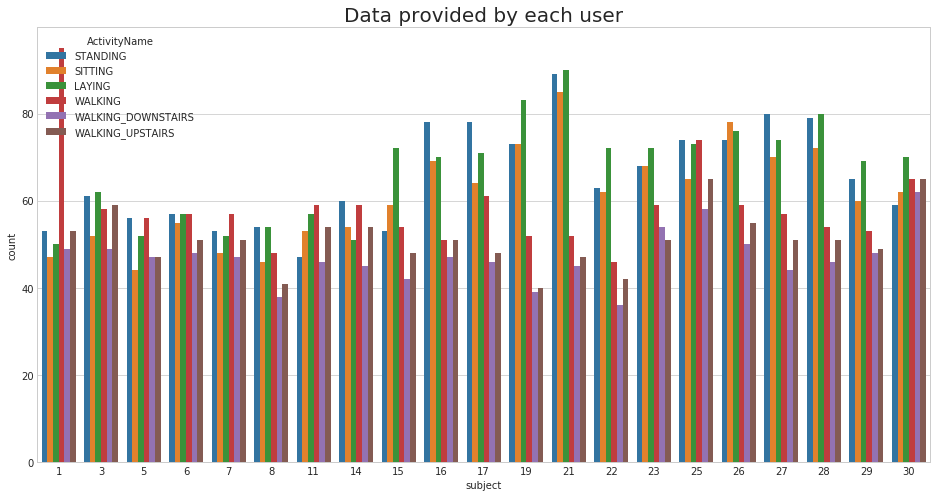

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


#### Inference: We have got almost same number of reading from all the subjects

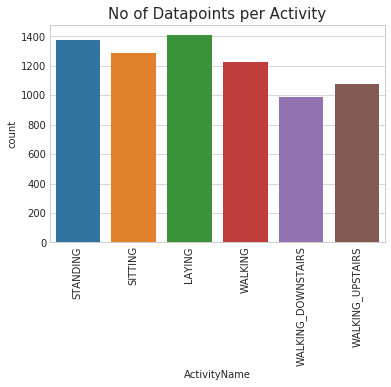

In [10]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [21]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

<ipython-input-21-d44704abf7e4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
<ipython-input-21-d44704abf7e4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
<ipython-input-21-d44704abf7e4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [22]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

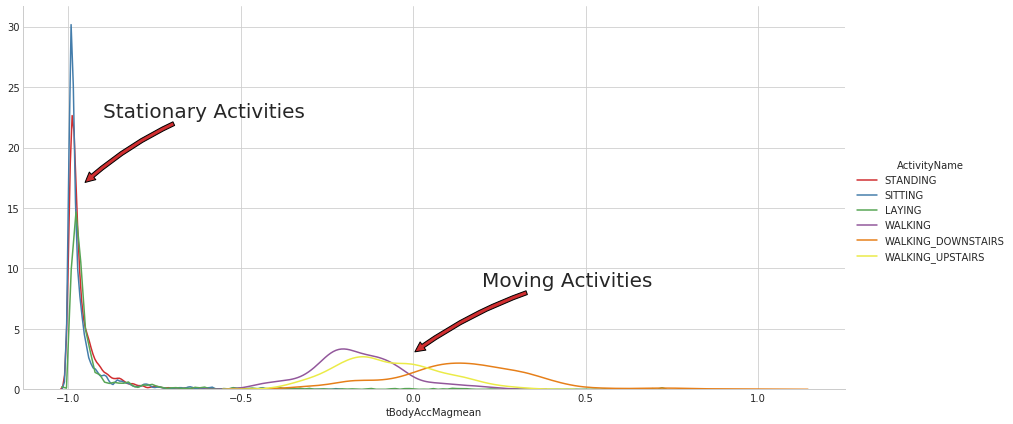

In [14]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

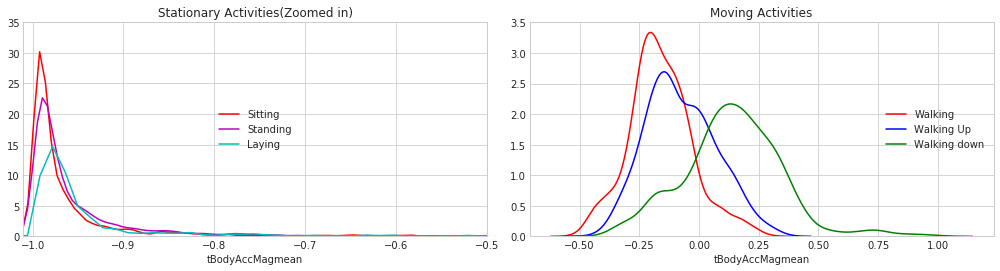

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

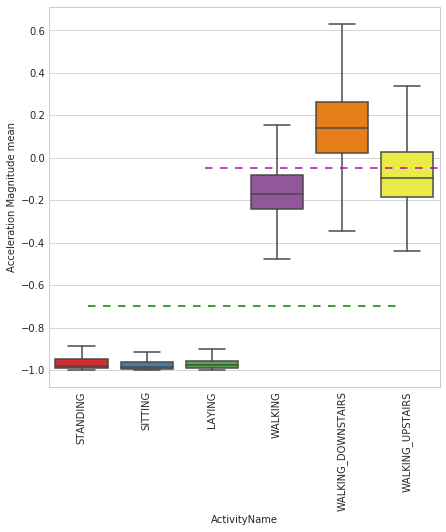

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

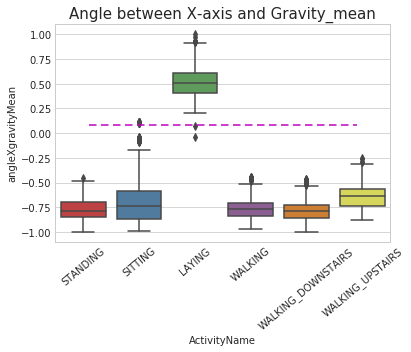

In [17]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

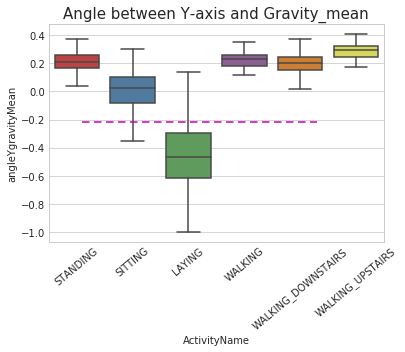

In [18]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

Install UMAP using the command
!pip install umap-learn

In [66]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from umap import UMAP

In [77]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    
    print('\n Creating UMAP object...')
    X_reduced_umap_3d = UMAP(n_components=3,verbose=2, init='random', random_state=0).fit_transform(X_data)
    print('Done..')
        
    # Plot using UMAP
        
    print("UMAP visualization")
    df_umap = pd.DataFrame({'x':X_reduced_umap_3d[:,0],'y':X_reduced_umap_3d[:,1] ,'z':X_reduced_umap_3d[:,2] ,'label':y_data})
        
    #sns.lmplot(data=df_umap, x='x', y='y', z='z', hue='label', fit_reg=False, size=8, palette="Set1",markers=['^','v','s','o', '1','2'])
    fig = px.scatter_3d(df_umap, x='x', y='y', z='z', color=y_data, size_max=20, opacity=0.7)
    fig.update_traces(marker_size=8)
    fig.show()
    
    #fig.update_layout(title_text="UMAP visualization - perplexity : {} and max_iter : {}".format(perplexity, n_iter),title_x=0.5)
    #fig.title("UMAP visualization - perplexity : {} and max_iter : {}".format(perplexity, n_iter))
    
    img_name = 'umap.png'
    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)
    plt.show()
    print('Done')
        
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\n Performing t-SNE with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced_tsne = TSNE(n_components=3, verbose=2, perplexity=perplexity).fit_transform(X_data)
        print("\nDone")
    
        print("t-SNE visualization - perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        df_tsne = pd.DataFrame({'x':X_reduced_tsne[:,0],'y':X_reduced_tsne[:,1] ,'z':X_reduced_tsne[:,2] ,'label':y_data})
    
        #sns.lmplot(data=df_tsne, x='x', y='y', z='z', hue='label', fit_reg=False, size=8,palette="Set1",markers=['^','v','s','o', '1','2'])
        # get colormap from seaborn
        
        fig = px.scatter_3d(df_tsne, x='x', y='y', z='z', color=y_data, size_max=20, opacity=0.7)
        fig.update_traces(marker_size=8)
        fig.show()
        
        #fig.update_layout(title_text="t-SNE visualization - perplexity : {} and max_iter : {}".format(perplexity, n_iter),title_x=0.5)
        #fig.title("t-SNE visualization - perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        
        print ("*"*50)
        


In [78]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
#perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[10,20,50])


 Creating UMAP object...
UMAP(init='random', n_components=3, random_state=0, verbose=2)
Fri Dec 16 22:39:42 2022 Construct fuzzy simplicial set
Fri Dec 16 22:39:42 2022 Finding Nearest Neighbors
Fri Dec 16 22:39:42 2022 Building RP forest with 9 trees
Fri Dec 16 22:39:42 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Fri Dec 16 22:39:42 2022 Finished Nearest Neighbor Search
Fri Dec 16 22:39:42 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri Dec 16 22:39:58 2022 Finished embedding
Done..
UMAP visualization


saving this plot as image in present working directory...


<Figure size 432x288 with 0 Axes>

Done

 Performing t-SNE with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...


C:\Users\saras\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\saras\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.089s
[t-SNE] Iteration 50: error = 106.1367798, gradient norm = 0.0099507 (50 iterations in 3.900s)
[t-SNE] Iteration 100: error = 89.0838165, gradient norm = 0.0064789 (50 iterations in 2.692s)
[t-SNE] Iteration 150: error = 86.1980057, gradient norm = 0.0019717 (50 iterations in 2.208s)
[t-SNE] Iteration 200: error = 85.2260437, gradi

saving this plot as image in present working directory...


<Figure size 432x288 with 0 Axes>

**************************************************

 Performing t-SNE with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...


C:\Users\saras\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\saras\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.148s
[t-SNE] Iteration 50: error = 97.9104843, gradient norm = 0.0112099 (50 iterations in 4.577s)
[t-SNE] Iteration 100: error = 83.4334717, gradient norm = 0.0037134 (50 iterations in 3.422s)
[t-SNE] Iteration 150: error = 81.4517670, gradient norm = 0.0013963 (50 iterations in 2.557s)
[t-SNE] Iteration 200: error = 80.8390656, gradie

saving this plot as image in present working directory...


<Figure size 432x288 with 0 Axes>

**************************************************

 Performing t-SNE with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.025s...


C:\Users\saras\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\saras\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.341s
[t-SNE] Iteration 50: error = 86.8711014, gradient norm = 0.0112753 (50 iterations in 4.942s)
[t-SNE] Iteration 100: error = 75.4750671, gradient norm = 0.0021786 (50 iterations in 5.064s)
[t-SNE] Iteration 150: error = 74.5846100, gradient norm = 0.0008450 (50 iterations in 4.110s)
[t-SNE] Iteration 200: error = 74.3056412, gradie

saving this plot as image in present working directory...


<Figure size 432x288 with 0 Axes>

**************************************************
